<a href="https://colab.research.google.com/github/Divya6859/real-estate-data-scraping/blob/main/WebScrap_RealEstateData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import requests
from bs4 import BeautifulSoup

In [29]:
url = "https://www.magicbricks.com/1-bhk-flats-for-rent-in-bangalore-pppfr"

In [30]:
# Use headers to mimic a browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/140.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers)
print("Status code:", response.status_code)

Status code: 200


In [31]:
# Parse the HTML
soup = BeautifulSoup(response.content, 'html.parser')

In [32]:
# Find all listing elements
listings = soup.find_all('div', class_='mb-srp__list')
print("Number of listings found:", len(listings))

Number of listings found: 30


In [33]:
# Write to CSV
with open('magicbricks_listings_1.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Title', 'Price', 'Furnished', 'Bathroom', 'Carpet Area', 'Tenant', 'Status'])

    for listing in listings:
        # Title and price
        title = listing.find('h2', class_='mb-srp__card--title')
        title = title.text.strip() if title else "Title not available"

        price = listing.find('div', class_='mb-srp__card__price--amount')
        price = price.text.strip() if price else "Price not available"

        # Summary details
        summary_elements = listing.find_all('div', class_='mb-srp__card__summary--value')
        furnished = summary_elements[0].text.strip() if len(summary_elements) > 0 else "Furnished not available"
        bathroom = summary_elements[1].text.strip() if len(summary_elements) > 1 else "Bathroom not available"
        tenant = summary_elements[2].text.strip() if len(summary_elements) > 2 else "Tenant not available"
        status = summary_elements[3].text.strip() if len(summary_elements) > 3 else "Status not available"
        carpet_area = summary_elements[4].text.strip() if len(summary_elements) > 4 else "Carpet Area not available"

        # Write row
        writer.writerow([title, price, furnished, bathroom, carpet_area, tenant, status])

print("Scraping completed. Data saved to magicbricks_listings_1.csv")


Scraping completed. Data saved to magicbricks_listings_1.csv


Exploratory Analysis

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_csv('/content/magicbricks_listings_1.csv')
df

,Title,Price,Furnished,Bathroom,Carpet Area,Tenant,Status
0,"1 BHK Flat for Rent in Btm Layout, Bangalore","₹27,000",Unfurnished,1,600 sqft,Bachelors,Immediately
1,1 BHK Flat for Rent in Seegehalli Krishnarajap...,"₹10,000",Unfurnished,1,500 sqft,Bachelors/Family,Immediately
2,1 BHK Flat for Rent in Bangalore,"₹22,000",Semi-Furnished,1,550 sqft,Bachelors/Family,Immediately
3,"1 BHK Flat for Rent in Doddanekundi, Kartik Na...","₹28,000",Furnished,1,700 sqft,Bachelors/Family,Immediately
4,"1 BHK Flat for Rent in Anup Layout, Bangalore","₹13,000",Semi-Furnished,1,500 sqft,Bachelors/Family,Immediately
5,1 BHK Flat for Rent in Phase 2 Electronic City...,"₹13,000",Semi-Furnished,1,450 sqft,Bachelors/Family,Immediately
6,"1 BHK Flat for Rent in NS Palya, Bangalore","₹15,000",Unfurnished,1,600 sqft,Bachelors/Family,Immediately
7,1 BHK Flat for Rent in Bangalore,"₹14,000",Semi-Furnished,1,110 sqft,Bachelors/Family,Immediately
8,"1 BHK Flat for Rent in Whitefield, Bangalore","₹28,000",Furnished,1,550 sqft,Bachelors/Family,Immediately
9,"1 BHK Flat for Rent in Devarachikkana Halli, B...","₹16,000",Semi-Furnished,1,500 sqft,Bachelors/Family,Immediately


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        30 non-null     object
 1   Price        30 non-null     object
 2   Furnished    30 non-null     object
 3   Bathroom     30 non-null     int64 
 4   Carpet Area  30 non-null     object
 5   Tenant       30 non-null     object
 6   Status       30 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.8+ KB


In [40]:
df.describe()

,Bathroom
count,30.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [41]:
df.isnull().sum()

,0
Title,0
Price,0
Furnished,0
Bathroom,0
Carpet Area,0
Tenant,0
Status,0


In [42]:
df.duplicated().sum()

np.int64(0)

Data Cleaning/Type Conversion

In [43]:
df['Price'] = df['Price'].str.replace('[^0-9]', '', regex=True).astype(float)
df['Carpet Area'] = df['Carpet Area'].str.replace('[^0-9.]', '', regex=True).astype(float)

In [44]:
df['Furnished'] = df['Furnished'].str.strip()
df['Tenant'] = df['Tenant'].str.strip()
df['Status'] = df['Status'].str.strip()

In [45]:
print("\n=== Numeric Summary ===")
print(df[['Price', 'Carpet Area', 'Bathroom']].describe())

print("\n=== Categorical Summary ===")
print("\nFurnished Distribution:\n", df['Furnished'].value_counts())
print("\nTenant Type Distribution:\n", df['Tenant'].value_counts())
print("\nStatus Distribution:\n", df['Status'].value_counts())


=== Numeric Summary ===
              Price  Carpet Area  Bathroom
count     30.000000    30.000000      30.0
mean   16483.333333   494.266667       1.0
std     7475.803882   157.399543       0.0
min     5000.000000   110.000000       1.0
25%    12000.000000   400.000000       1.0
50%    15000.000000   500.000000       1.0
75%    19000.000000   600.000000       1.0
max    37000.000000   900.000000       1.0

=== Categorical Summary ===

Furnished Distribution:
 Furnished
Semi-Furnished    19
Furnished          7
Unfurnished        4
Name: count, dtype: int64

Tenant Type Distribution:
 Tenant
Bachelors/Family    19
Bachelors           11
Name: count, dtype: int64

Status Distribution:
 Status
Immediately     27
From Oct '25     3
Name: count, dtype: int64


In [46]:
sns.set(style="whitegrid")

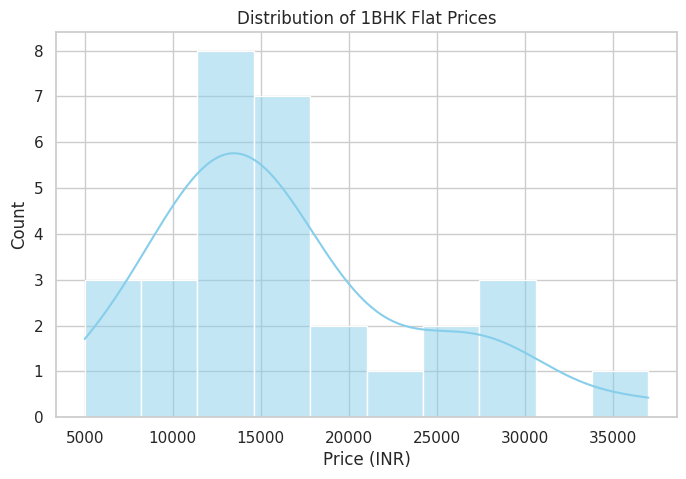

In [47]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of 1BHK Flat Prices")
plt.xlabel("Price (INR)")
plt.ylabel("Count")
plt.show()

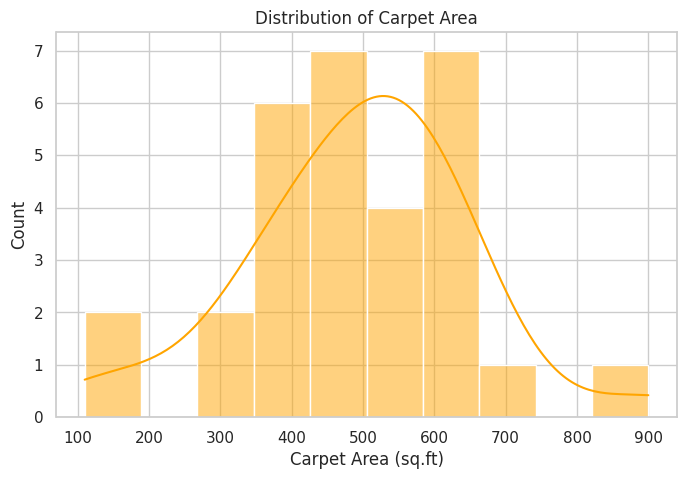

In [48]:
plt.figure(figsize=(8,5))
sns.histplot(df['Carpet Area'], bins=10, kde=True, color='orange')
plt.title("Distribution of Carpet Area")
plt.xlabel("Carpet Area (sq.ft)")
plt.ylabel("Count")
plt.show()

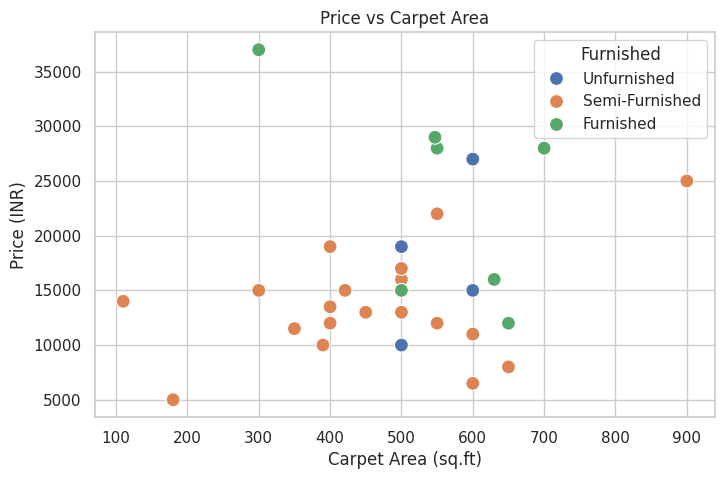

In [49]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Carpet Area', y='Price', hue='Furnished', s=100)
plt.title("Price vs Carpet Area")
plt.xlabel("Carpet Area (sq.ft)")
plt.ylabel("Price (INR)")
plt.show()

/tmp/ipython-input-4226760515.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Furnished', palette='Set2')


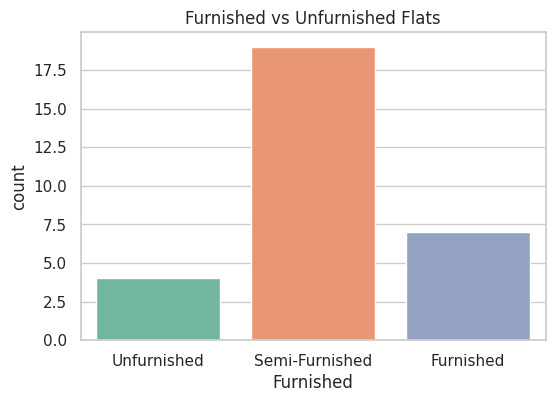

In [50]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Furnished', palette='Set2')
plt.title("Furnished vs Unfurnished Flats")
plt.show()

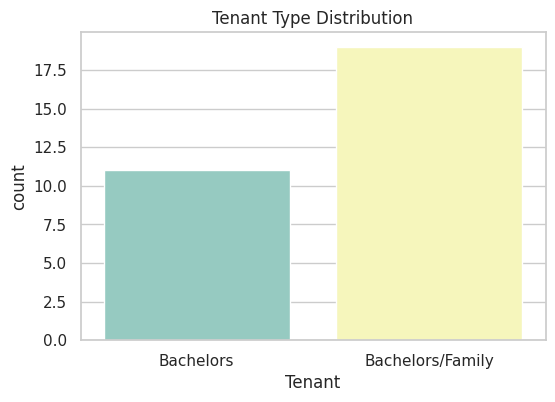

In [55]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Tenant', palette='Set3')
plt.title("Tenant Type Distribution")
plt.show()

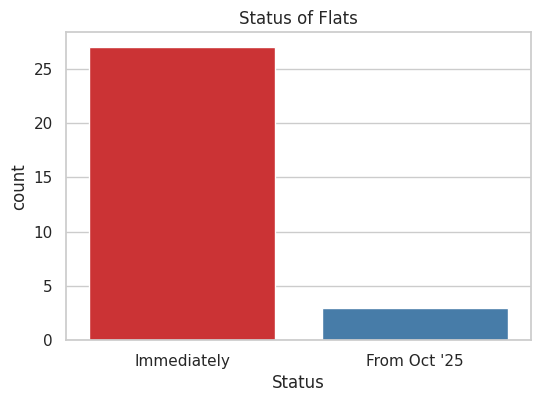

In [56]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Status', palette='Set1')
plt.title("Status of Flats")
plt.show()

In [58]:
# Average price by Furnished
avg_price_furnished = df.groupby('Furnished')['Price'].mean()
print("\nAverage Price by Furnished Status:\n", avg_price_furnished)


Average Price by Furnished Status:
 Furnished
Furnished         23571.428571
Semi-Furnished    13605.263158
Unfurnished       17750.000000
Name: Price, dtype: float64


In [59]:
# Average price by Tenant type
avg_price_tenant = df.groupby('Tenant')['Price'].mean()
print("\nAverage Price by Tenant Type:\n", avg_price_tenant)


Average Price by Tenant Type:
 Tenant
Bachelors           14545.454545
Bachelors/Family    17605.263158
Name: Price, dtype: float64


In [60]:
# Average price by Status
avg_price_status = df.groupby('Status')['Price'].mean()
print("\nAverage Price by Status:\n", avg_price_status)


Average Price by Status:
 Status
From Oct '25    14666.666667
Immediately     16685.185185
Name: Price, dtype: float64


In [61]:
df.to_csv('magicbricks_listings_cleaned.csv', index=False)
print("\nCleaned dataset saved as magicbricks_listings_cleaned.csv")


Cleaned dataset saved as magicbricks_listings_cleaned.csv
